In [1]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

from matplotlib import gridspec


Welcome to JupyROOT 6.24/02


In [2]:
ending = "Dec19_MECTune"

In [3]:
##Regular tune prior true and smearcept to be used


#Recall for comparison it will be the MEC tune for prior true

In [3]:
####Load in MECTune full event counts

nue_data_signal = pd.read_csv("nue_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)
print("")

######

numu_data_signal = pd.read_csv("numu_full_500_catsel_nopions_recoE_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", header=None)

numu_data_signal = numu_data_signal.values[:, 0]

print(numu_data_signal)

[220.97771802  23.30296743  14.65629487   6.59024997   3.98846723
   3.27520477   2.64027246   4.02022308]

[1434.26463865  443.01059307  335.6070573   205.8691979   139.0394125
   90.44701141   42.67964248   83.91027959]


In [4]:
###Load in regular tune bkg event counts
#Include ext in bkg count here as the full event counts do

ending = "Dec19" #need this ending as bkg is from regular tune



nue_bkg_inc_ext = pd.read_csv("nue_nopions_energy_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", header=None)

nue_bkg_inc_ext = nue_bkg_inc_ext.values[:, 0]

print(nue_bkg_inc_ext)
print("")

#######################

numu_bkg_inc_ext = pd.read_csv("numu_nopions_energy_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", header=None)

numu_bkg_inc_ext = numu_bkg_inc_ext.values[:, 0]

print(numu_bkg_inc_ext)
print("")

[62.59224335  5.55573535  5.02205593  2.00620096  0.97365075  1.10218284
  1.1300239   1.42903398]

[415.01103581 119.69596297  89.30328865  60.57022222  38.65368768
  24.6720737   15.53150675  25.7901954 ]



In [5]:
####So then can calculate the data signal input to the unfolding

nue_datasig_bkg_subtracted = nue_data_signal - nue_bkg_inc_ext
print(nue_datasig_bkg_subtracted)
print("")

numu_datasig_bkg_subtracted = numu_data_signal - numu_bkg_inc_ext
print(numu_datasig_bkg_subtracted)

[158.38547467  17.74723207   9.63423893   4.58404901   3.01481648
   2.17302194   1.51024856   2.5911891 ]

[1019.25360284  323.31463009  246.30376866  145.29897568  100.38572482
   65.77493772   27.14813573   58.1200842 ]


In [6]:
nue_numu_tot = np.concatenate((nue_datasig_bkg_subtracted, numu_datasig_bkg_subtracted), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[ 158.38547467   17.74723207    9.63423893    4.58404901    3.01481648
    2.17302194    1.51024856    2.5911891  1019.25360284  323.31463009
  246.30376866  145.29897568  100.38572482   65.77493772   27.14813573
   58.1200842 ]
16


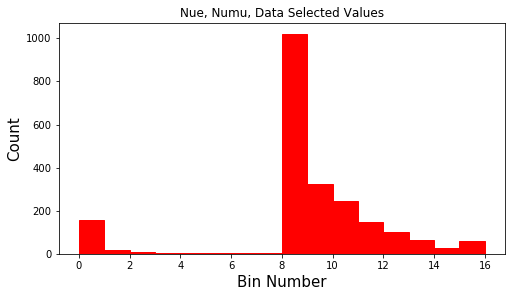

In [7]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_MECTune_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

In [8]:
np.savetxt("data_signal_MC_MECTune_input_recoE_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

print(ending)

Dec19


In [9]:
####Now need to get in the uncertainties

###First up, get the noTune statistical uncertinaty. This will be from sig + bkg in noTune

ending = "Dec19_MECTune" 


nue_sig_unc = pd.read_csv("nue_total_noTune_err_squared_energy_comb_"+ending+".csv", header=None)

nue_sig_unc = nue_sig_unc.values[:, 0]

print(nue_sig_unc)
print("")

########################

numu_sig_unc = pd.read_csv("numu_total_noTune_err_squared_energy_comb_"+ending+".csv", header=None)

numu_sig_unc = numu_sig_unc.values[:, 0]

print(numu_sig_unc)
print("")

#######################The regular tune bkg stat uncertainties

ending = "Dec19" #need this ending as bkg is from regular tune


nue_bkg_unc = pd.read_csv("nue_bkg_exp_err_squared_energy_comb_"+ending+".csv", header=None)

nue_bkg_unc = nue_bkg_unc.values[:, 0]

print(nue_bkg_unc)
print("")

########################

numu_bkg_unc = pd.read_csv("numu_bkg_exp_err_squared_energy_comb_"+ending+".csv", header=None)

numu_bkg_unc = numu_bkg_unc.values[:, 0]

print(numu_bkg_unc)
print("")

[26.7239708   2.2448204   1.55713956  0.37882524  0.15912238  0.19774219
  0.29407827  0.22896632]

[1093.81063836  407.6950158   404.18640451  199.95846033  173.99564315
  124.75714442   22.43477239   92.25813171]

[13.54005544  0.50655146  0.630814    0.2048277   0.01706823  0.13865351
  0.18420521  0.16901565]

[143.18992306  32.15392447  23.73478076  15.40010457  14.09497304
   8.15430659   5.02663155   5.43286998]



In [10]:
nue_stat_unc = nue_sig_unc + nue_bkg_unc
print(nue_stat_unc)
print("")

########################

numu_stat_unc = numu_sig_unc + numu_bkg_unc
print(numu_stat_unc)
print("")

#########################

nue_numu_tot_unc = np.concatenate((nue_stat_unc, numu_stat_unc), axis=0)

print(nue_numu_tot_unc)

[40.26402624  2.75137186  2.18795356  0.58365295  0.17619061  0.3363957
  0.47828348  0.39798198]

[1237.00056143  439.84894026  427.92118527  215.35856489  188.09061619
  132.91145101   27.46140394   97.69100169]

[4.02640262e+01 2.75137186e+00 2.18795356e+00 5.83652946e-01
 1.76190612e-01 3.36395696e-01 4.78283476e-01 3.97981977e-01
 1.23700056e+03 4.39848940e+02 4.27921185e+02 2.15358565e+02
 1.88090616e+02 1.32911451e+02 2.74614039e+01 9.76910017e+01]


In [11]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_tot_unc

In [13]:
###Then sprinkle in the regular tune genie sys uncertainties

# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_RecoE_comb_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[ 7.02584754e+02  9.66961224e+01  4.72505820e+01  1.95653861e+01
   1.55394334e+01  8.94111218e+00  9.28134248e+00  1.34670857e+01
   4.71351688e+02  1.38674156e+02  8.23006911e+01  5.31638324e+01
   3.38088659e+01  2.03134134e+01  1.56197023e+01  2.35509042e+01]
 [ 9.66961224e+01  1.41866669e+01  6.55743105e+00  2.65187422e+00
   2.23032423e+00  1.19496853e+00  1.29913089e+00  1.87508348e+00
   3.33971308e+00  3.40906010e-01 -3.90257578e+00 -2.07148673e+00
  -1.48469940e+00 -8.33071089e-01  5.01995680e-01 -9.37515310e-01]
 [ 4.72505820e+01  6.55743105e+00  3.64302075e+00  1.39455931e+00
   1.07560765e+00  6.63893934e-01  6.43107645e-01  9.02718599e-01
   2.86365182e+01  1.12475099e+01  4.76837143e+00  3.80393571e+00
   2.37646504e+00  1.35923712e+00  1.84784207e+00  1.80189479e+00]
 [ 1.95653861e+01  2.65187422e+00  1.39455931e+00  6.61086878e-01
   4.69503414e-01  3.01099636e-01  2.41223780e-01  4.21723566e-01
   1.81158248e+01  6.22601207e+00  5.45933666e+00  3.35201679e+00
   2.25

In [14]:
##### Now make the total cov matrix

total_noTune_input_cov = nue_numu_cov_stats + blockwise_genie_err

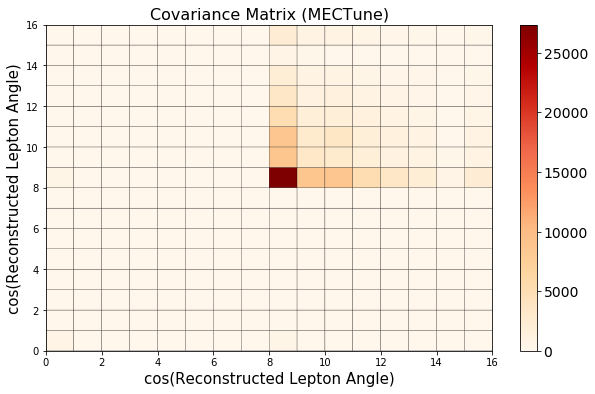

In [15]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_noTune_input_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)

plt.title('Covariance Matrix (MECTune)', fontsize=16)


plt.savefig("data_covmat_MC_MECTune_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [16]:
np.savetxt("data_covmat_MC_MECTune_input_recoE_comb_"+ending+".csv", 
           total_noTune_input_cov,
           delimiter =", ", 
           fmt ='% s')